In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
X = pd.read_csv("./p1/uspsdata.txt", 
                 sep="\t", 
                 header=None)
y = pd.read_csv("./p1/uspscl.txt", 
                 sep="\t", 
                 header=None)

print(X.shape)
print(y.shape)

(200, 256)
(200, 1)


In [8]:
X=np.array(X)
y=np.array(y)
y=y.ravel()

##Problem-1-a: Linear SVM with Soft Margin

Ans:

Based on the following analysis result, I would propose the best SVM Linear model would be with parameter C=1e-20. In this question, we aim to find the best soft margin (Means the least C value, the softer margin) to achieve the least classification error. The x-axis of following plot is drawn with log scale due to the very less C value. The best accuracy was 96.25% for Training and 92.5% for Testing. With the above choosen report accuracy it has the least over-fitting problem.  

In [9]:
from sklearn.cross_validation import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn import svm
import math

def calc_params(x_train,x_test,y_train, clf):
    model=clf
    model = model.fit(x_train,y_train)
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    return pred_train, pred_test

def calc_accuracy(pred_train, pred_test, y_train, y_test):
    train_score = accuracy_score(y_train, pred_train)
    test_score = accuracy_score(y_test, pred_test)
    return train_score, test_score

Dimenision of Training Predictor Samples is  (160, 256)
Dimenision of Training Target Samples is  (160,)
Dimenision of Testing Predictors Sample is  (40, 256)
Dimenision of Testing Target Samples is  (40,)
    log_c_value  train_score  test_score
0   -230.258509       0.9750       0.925
1   -115.129255       0.9750       0.925
2    -69.077553       0.9750       0.925
3    -52.959457       0.9750       0.925
4    -57.564627       0.9750       0.925
5    -46.051702       0.9625       0.925
6    -39.143947       0.9625       0.925
7    -34.538776       0.9625       0.925
8    -23.025851       0.9625       0.925
9    -18.420681       0.9625       0.925
10   -16.118096       0.9875       0.925
11   -13.815511       0.9875       0.925
12   -11.512925       1.0000       0.925
13    -6.907755       1.0000       0.925
14     0.000000       1.0000       0.925
15     4.605170       1.0000       0.925
16     6.907755       1.0000       0.925
17     9.210340       1.0000       0.925


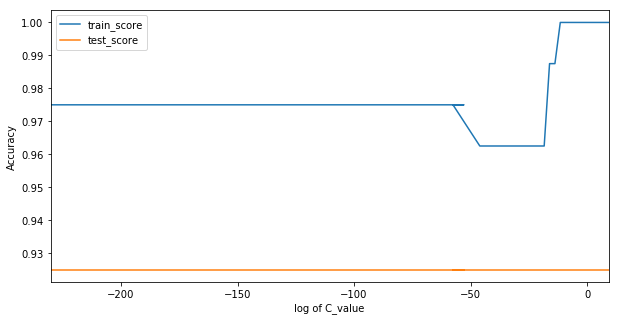

In [28]:
#Split the data into Training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, #Set 20% Testing Samples of the original dataset
                                                    random_state=28,
                                                    stratify=y #Divide the dataset by Stratified Holdout method
                                                   )

#Check the size of the Samples in Training and Testing Samples
print("Dimenision of Training Predictor Samples is ",x_train.shape)
print("Dimenision of Training Target Samples is ",y_train.shape)
print("Dimenision of Testing Predictors Sample is ",x_test.shape)
print("Dimenision of Testing Target Samples is ",y_test.shape)

#Set the C values for the C parameters
C_values=[1e-100,1e-50,1e-30,1e-23,1e-25,1e-20,1e-17,1e-15,1e-10,1e-8,1e-7,1e-6,1e-5,1e-3,1,100,1000,10000]
#Set the Linear Kernel
kernel_name="linear"
r_s = 28

train_score_lst=[]
test_score_lst=[]

for C_value in C_values:
    clf = svm.SVC(C = C_value, random_state=r_s, kernel=kernel_name)
    pred_train, pred_test = calc_params(x_train,x_test,y_train, clf)
    train_score, test_score = calc_accuracy(pred_train, pred_test, y_train, y_test)
    train_score_lst.append(train_score)
    test_score_lst.append(test_score)

log_C_values_lst = list(map(math.log,C_values))
df = pd.DataFrame(list(zip(log_C_values_lst,train_score_lst,test_score_lst)), 
                  columns=("log_c_value","train_score","test_score"))
print(df)
df.plot(x="log_c_value", figsize=(10,5))
plt.xlabel('log of C_value')
plt.ylabel("Accuracy")
plt.show()

    log_c_value  train_error  test_error
0   -230.258509       0.0250       0.075
1   -115.129255       0.0250       0.075
2    -69.077553       0.0250       0.075
3    -52.959457       0.0250       0.075
4    -57.564627       0.0250       0.075
5    -46.051702       0.0375       0.075
6    -39.143947       0.0375       0.075
7    -34.538776       0.0375       0.075
8    -23.025851       0.0375       0.075
9    -18.420681       0.0375       0.075
10   -16.118096       0.0125       0.075
11   -13.815511       0.0125       0.075
12   -11.512925       0.0000       0.075
13    -6.907755       0.0000       0.075
14     0.000000       0.0000       0.075
15     4.605170       0.0000       0.075
16     6.907755       0.0000       0.075
17     9.210340       0.0000       0.075


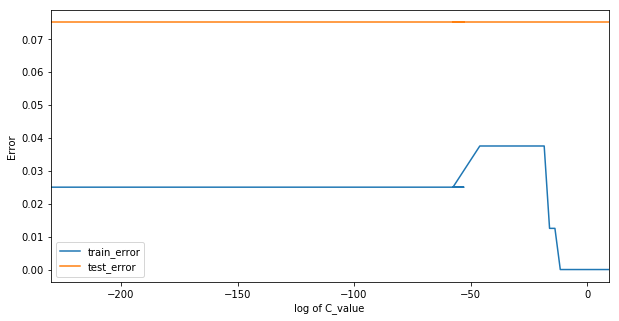

In [29]:
train_error_lst = 1-df.train_score
test_error_lst = 1-df.test_score

df = pd.DataFrame(list(zip(log_C_values_lst,train_error_lst,test_error_lst)), 
                  columns=("log_c_value","train_error","test_error"))
print(df)
df.plot(x="log_c_value", figsize=(10,5))
plt.xlabel('log of C_value')
plt.ylabel("Error")
plt.show()

##Problem-1-b: Non-Linear SVM with Soft margin and Gaussian Kernel

Ans:

Based on the following analysis result, I would propose the best SVM Non-Linear model would be with parameter (C = 1e-50) and Gaussian Kernel(gamma=0.001). In this question, we aim to find the best soft margin (Means the least C value, the softer margin) and sigma (Gamma Value) to achieve the least classification error. The x-axis of following plot is drawn with log scale due to the very less C value. The best accuracy was 100% for Training and 97.5% for Testing. With the above choosen report accuracy it has the least over-fitting problem.

Dimenision of Training Predictor Samples is  (160, 256)
Dimenision of Training Target Samples is  (160,)
Dimenision of Testing Predictors Sample is  (40, 256)
Dimenision of Testing Target Samples is  (40,)
         c_value  gamma_value  train_error  test_error
0  1.000000e-100   -16.118096      0.08750       0.100
1  1.000000e-100   -13.815511      0.06875       0.100
2  1.000000e-100   -11.512925      0.00000       0.050
3  1.000000e-100    -9.210340      0.00000       0.050
4  1.000000e-100    -6.907755      0.00000       0.075
        c_value  gamma_value  train_error  test_error
0  1.000000e-50   -16.118096      0.08750       0.100
1  1.000000e-50   -13.815511      0.06875       0.100
2  1.000000e-50   -11.512925      0.00000       0.050
3  1.000000e-50    -9.210340      0.00000       0.050
4  1.000000e-50    -6.907755      0.00000       0.025
        c_value  gamma_value  train_error  test_error
0  1.000000e-30   -16.118096      0.08750       0.100
1  1.000000e-30   -13.815511    

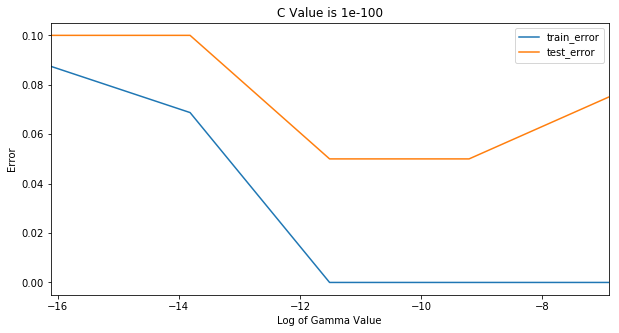

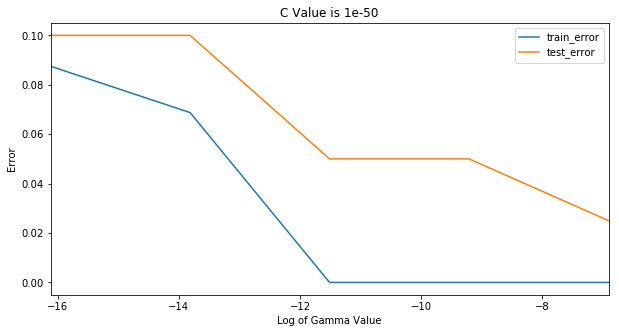

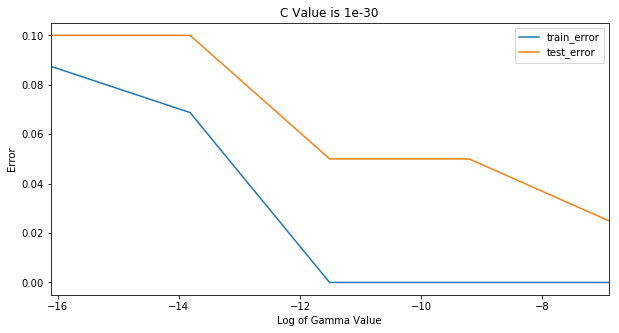

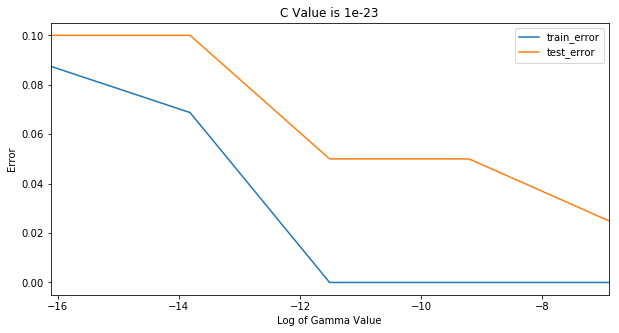

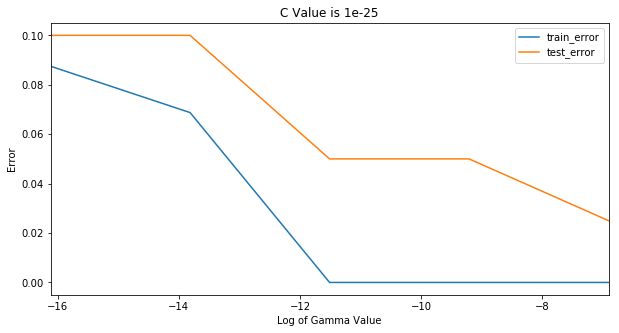

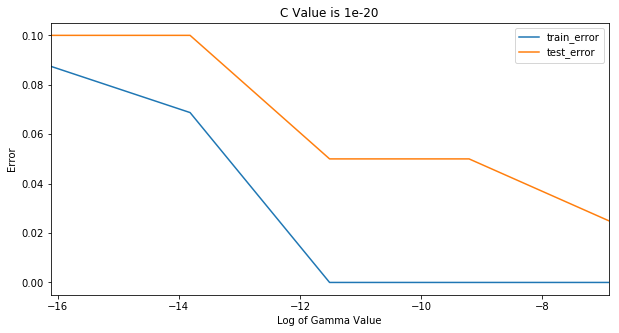

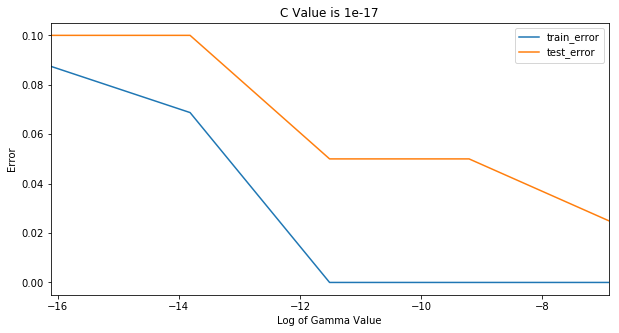

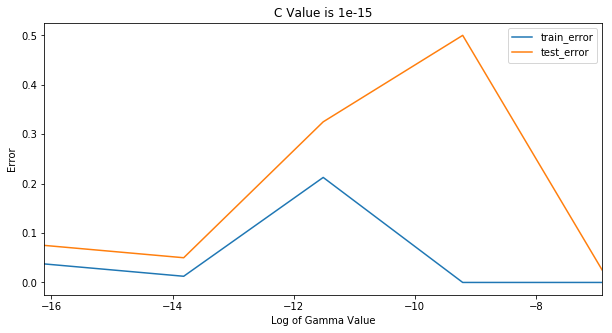

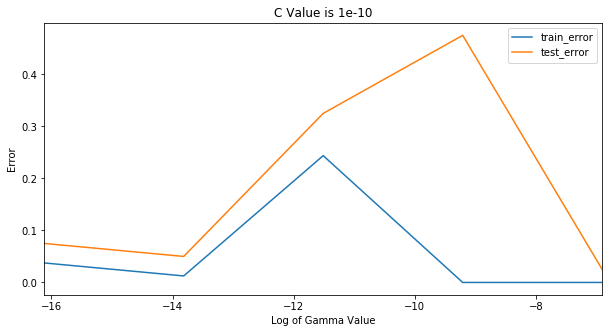

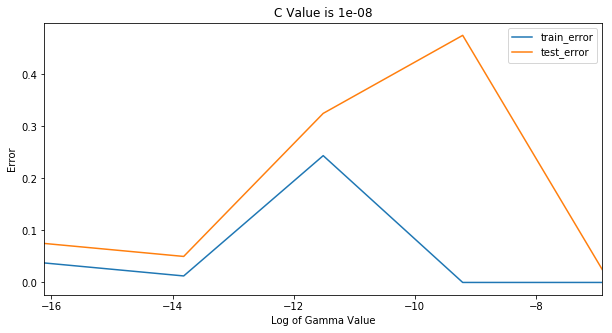

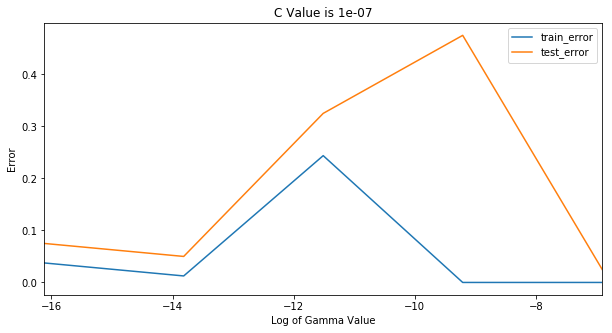

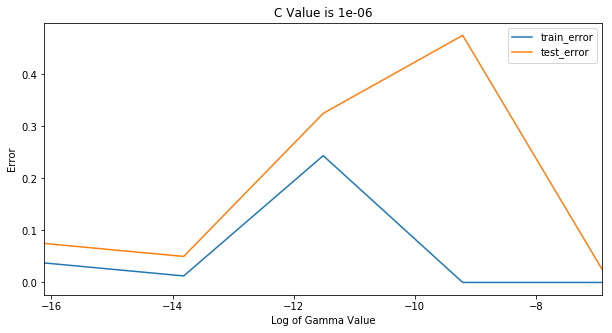

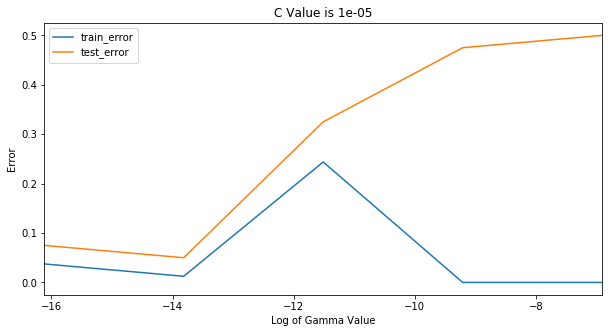

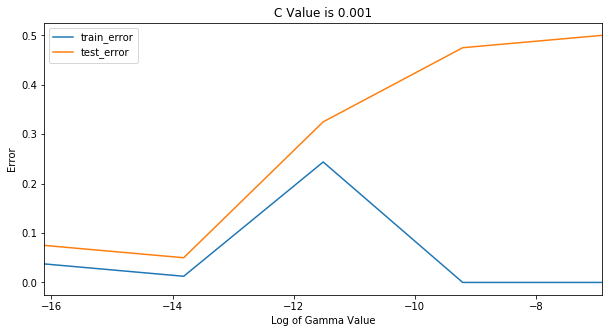

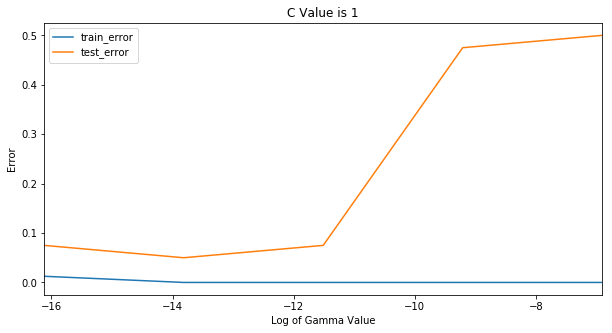

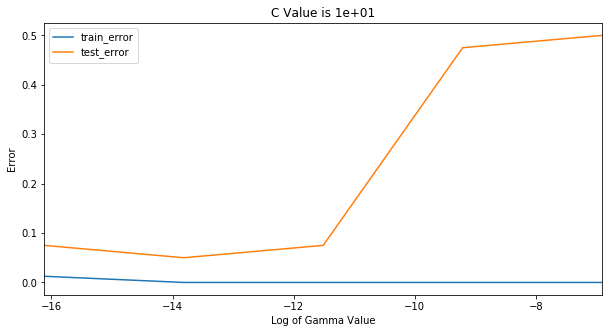

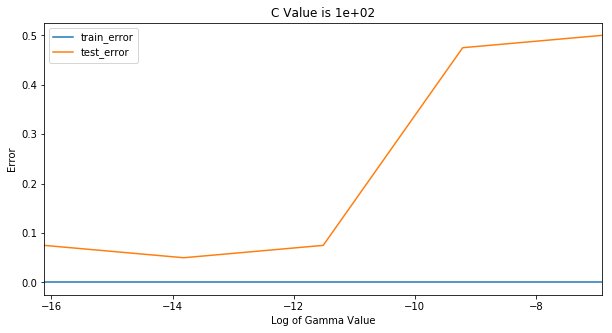

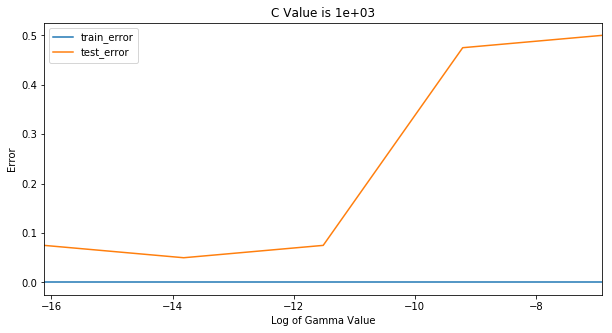

In [27]:
#Split the data into Training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, #Set 20% Testing Samples of the original dataset
                                                    random_state=28,
                                                    stratify=y #Divide the dataset by Stratified Holdout method
                                                   )
#Check the size of the Samples in Training and Testing Samples
print("Dimenision of Training Predictor Samples is ",x_train.shape)
print("Dimenision of Training Target Samples is ",y_train.shape)
print("Dimenision of Testing Predictors Sample is ",x_test.shape)
print("Dimenision of Testing Target Samples is ",y_test.shape)

#Set values of "C" parameter
C_values=[1e-100,1e-50,1e-30,1e-23,1e-25,1e-20,1e-17,1e-15,1e-10,1e-8,1e-7,1e-6,1e-5,1e-3,1,10,100,1000]

#Set values of "gamma" parameter
gamma_values=[0.0000001,0.000001,0.00001,0.0001,0.001] 
#Set the Gaussian kernel
kernel_name="rbf"
r_s = 28
K=0
test_size_num = 0.2

for C_value in C_values:
    train_score_lst=[]
    test_score_lst=[]
    train_error_lst=[]
    test_error_lst=[]
    C_lst=[]
    gamma_lst=[]
    for gamma_value in gamma_values:
        clf = svm.SVC(C = C_value, random_state=r_s, kernel=kernel_name,gamma=gamma_value )
        pred_train, pred_test = calc_params(x_train,x_test,y_train, clf)
        train_score, test_score = calc_accuracy(pred_train, pred_test, y_train, y_test)
        #train_score_lst.append(train_score)
        #test_score_lst.append(test_score)
        train_error_lst.append(1-train_score)
        test_error_lst.append(1-test_score)
        C_lst.append(C_value)
        gamma_lst.append(gamma_value)
   
    gamma_lst = list(map(math.log,gamma_lst))
    
    df = pd.DataFrame(list(zip(C_lst, gamma_lst,train_error_lst,test_error_lst)),
                 columns=("c_value","gamma_value","train_error","test_error"))
    print(df)
    df.ix[:,1:].plot(x="gamma_value", figsize=(10,5))
    plt.title("C Value is %0.1g"%(df.c_value[0]))
    plt.xlabel("Log of Gamma Value")
    plt.ylabel("Error")
    

##Probem-1-c: compare result of Linear and Non-Linear models

Ans

As we have seen below, the Non-Linear SVM Model offers a higher Accuracy (Training=100%, Testing=97.5%) comparing with the Accuracy of Linear Model (Training=96.25%, Testing=92.5%) , so that I would propose Non-Linear SVM is the best choice for this case.

In [82]:
#Verify the Accuracy of the Linear Model with Soft Margin (C = 1e-20) 
model = svm.SVC(C =1e-20 , random_state=r_s, kernel="linear")
model = model.fit(x_train,y_train)
pred_train = model.predict(x_train)
print("The Best Choosen SVM Linear Model with Soft Margin (C = 1e-20)")

print("Accuracy of Linear SVM Model on Training set is ",accuracy_score(y_train,pred_train)*100,"%")

pred_test = model.predict(x_test)
print("Accuracy of Linear SVM Model on Testing set is ",accuracy_score(y_test,pred_test)*100,"%")

The Best Choosen SVM Linear Model with Soft Margin (C = 1e-20)
Accuracy of Linear SVM Model on Training set is  96.25 %
Accuracy of Linear SVM Model on Testing set is  92.5 %


##Extra Credit:

####Training Set: Incorrectly Classified in Linear Model

The following images are misclassified in the Training Samples (Linear)


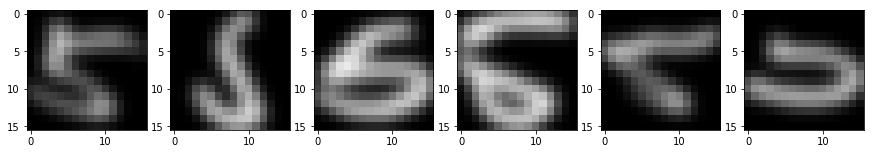

In [108]:
df2 = pd.DataFrame(list(zip(y_train,pred_train)))
train_data = pd.DataFrame(x_train)
false_train_data= train_data[(df2.ix[:,0] == df2.ix[:,1])==False]
print("The following images are misclassified in the Training Samples (Linear)")
plt.figure(figsize=(15,10))
for i in range(false_train_data.shape[0]):
    img_lst = false_train_data.iloc[i].copy()
    img_lst=np.array(img_lst)
    img_lst.resize((16,16))
    img_lst.shape
    im = Image.fromarray(img_lst)
    plt.subplot(1,6 , i+1)
    plt.imshow(im)

The following images are correctly classified in the Training Samples (Linear)


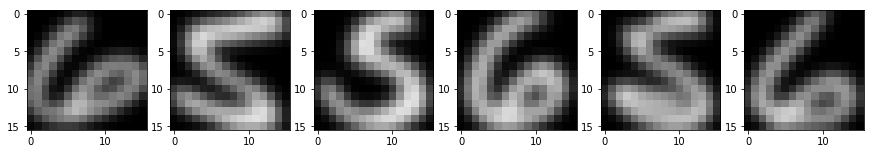

In [111]:
df2 = pd.DataFrame(list(zip(y_train,pred_train)))
train_data = pd.DataFrame(x_train)
True_train_data= train_data[(df2.ix[:,0] == df2.ix[:,1])==True]
print("The following images are correctly classified in the Training Samples (Linear)")
plt.figure(figsize=(15,10))
for i in range(0,6):
    img_lst = True_train_data.iloc[i].copy()
    img_lst=np.array(img_lst)
    img_lst.resize((16,16))
    img_lst.shape
    im = Image.fromarray(img_lst)
    plt.subplot(1,6 , i+1)
    plt.imshow(im)

The following images are misclassified in the Testing Samples (Linear Model)


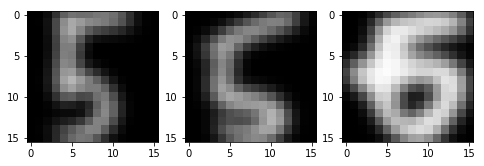

In [107]:
df2 = pd.DataFrame(list(zip(y_test,pred_test)))
test_data = pd.DataFrame(x_test)
false_test_data= test_data[(df2.ix[:,0] == df2.ix[:,1])==False]
print("The following images are misclassified in the Testing Samples (Linear Model)")
plt.figure(figsize=(8,10))
for i in range(false_test_data.shape[0]):
    img_lst = false_test_data.iloc[i].copy()
    img_lst=np.array(img_lst)
    img_lst.resize((16,16))
    img_lst.shape
    im = Image.fromarray(img_lst)
    plt.subplot(1,3 , i+1)
    plt.imshow(im)


The following images are correctly in the Testing Samples (Linear Model)


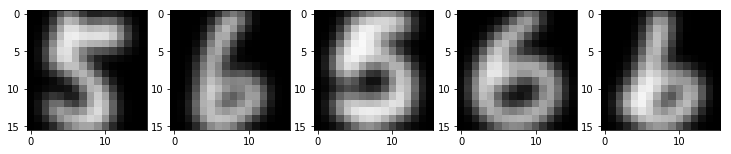

In [114]:
df2 = pd.DataFrame(list(zip(y_test,pred_test)))
test_data = pd.DataFrame(x_test)
True_test_data= test_data[(df2.ix[:,0] == df2.ix[:,1])==True]
print("The following images are correctly classified in the Testing Samples (Linear Model)")
plt.figure(figsize=(15,10))
for i in range(1,6):
    img_lst = True_test_data.iloc[i].copy()
    img_lst=np.array(img_lst)
    img_lst.resize((16,16))
    img_lst.shape
    im = Image.fromarray(img_lst)
    plt.subplot(1,6 , i+1)
    plt.imshow(im)



In [122]:
#Verify the Accuracy of the Non-Linear Model with Soft Margin (C = 1.000000e-50) and Gaussian Kernel(gamma=0.001)
model = svm.SVC(C =1.000000e-50 , random_state=r_s, kernel="rbf",gamma=0.001 )
model = model.fit(x_train,y_train)
pred_train = model.predict(x_train)

print("The Best Choosen SVM non-Linear Model with Soft Margin(C = 1.0e-50) and Gaussian Kernel(gamma=0.001)")
print("Accuracy of Non-Linear SVM Model on Training set is ",accuracy_score(y_train,pred_train)*100,"%")

pred_test = model.predict(x_test)
print("Accuracy of Non-Linear SVM Model on Testing set is ",accuracy_score(y_test,pred_test)*100,"%")


The Best Choosen SVM non-Linear Model with Soft Margin(C = 1.0e-50) and Gaussian Kernel(gamma=0.001)
Accuracy of Non-Linear SVM Model on Training set is  100.0 %
Accuracy of Non-Linear SVM Model on Testing set is  97.5 %


The 
Note: The gamma parameters can be explained as the inverse of the radius of influence of data samples selected by the SVM model as support vectors. In the aspect of classification, The higher the value of gamma means the less of the area covered for the specified class label or vica versa.

##Extra Credit:
####Training Set: Incorrectly Classified in Linear Model

The following images are misclassified in the Testing Samples (Non-Linear Model)


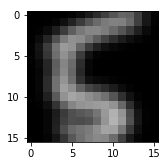

In [126]:
df2 = pd.DataFrame(list(zip(y_test,pred_test)))
test_data = pd.DataFrame(x_test)
false_test_data= test_data[(df2.ix[:,0] == df2.ix[:,1])==False]
print("The following images are misclassified in the Testing Samples (Non-Linear Model)")
plt.figure(figsize=(8,10))
for i in range(false_test_data.shape[0]):
    img_lst = false_test_data.iloc[i].copy()
    img_lst=np.array(img_lst)
    img_lst.resize((16,16))
    img_lst.shape
    im = Image.fromarray(img_lst)
    plt.subplot(1,3 , i+1)
    plt.imshow(im)

The following images are correctly classified in the Testing Samples (Non-Linear Model)


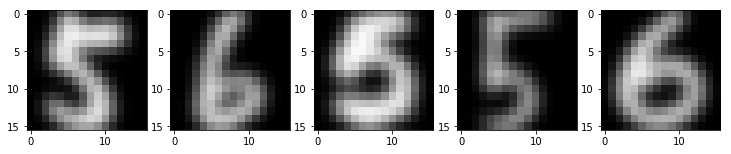

In [125]:
df2 = pd.DataFrame(list(zip(y_test,pred_test)))
test_data = pd.DataFrame(x_test)
True_test_data= test_data[(df2.ix[:,0] == df2.ix[:,1])==True]
print("The following images are correctly classified in the Testing Samples (Non-Linear Model)")
plt.figure(figsize=(15,10))
for i in range(1,6):
    img_lst = True_test_data.iloc[i].copy()
    img_lst=np.array(img_lst)
    img_lst.resize((16,16))
    img_lst.shape
    im = Image.fromarray(img_lst)
    plt.subplot(1,6 , i+1)
    plt.imshow(im)

###Summary of Images

According to the above plotting, we could observe the difference between the correctly and incorrectly classified instances. Those misclassified instances are mostly appeared very blur. Also, their white color portion are mostly NOT aligned close enough to the digital shape of 5 and 6. 

Comparing to the Linear and Non-Linear, the Gaissoam kernel seems more 

##Problem-2: (E-commerce Customer Identification using ensemble of classifier)

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
X_train = pd.read_csv("./p2/train10000.csv", header=None)
y_train = pd.read_csv("./p2/train10000_Label.csv", header=None)
X_test = pd.read_csv("./p2/test10000.csv", header=None)
y_test = pd.read_csv("./p2/test10000_Label.csv", header=None)


print("The dimenision of the Training set is ",X_train.shape)
print("The dimenision of the Testing set is ",X_test.shape)
print("The dimenision of the Training Class labels is ",y_train.shape)
print("The dimenision of the Testing Class labels is ",y_test.shape)


The dimenision of the Training set is  (10000, 334)
The dimenision of the Testing set is  (10000, 334)
The dimenision of the Training Class labels is  (10000, 1)
The dimenision of the Testing Class labels is  (10000, 1)


In [74]:
#Show training Variables
X_train.head(3)

,0,1,2,3,4,5,6,7,8,9,...,324,325,326,327,328,329,330,331,332,333
0,999000.0,46,2.0,46,196000.0,2.0,999000.0,4.0,3.0,999000.0,...,59,19,99,21,6,8,11,27,254,110
1,1.0,50,1.0,50,196000.0,1.0,4.0,7.0,5.0,1.0,...,51,24,89,13,11,2,10,30,169,144
2,999000.0,50,1.0,50,196000.0,1.0,4.0,999000.0,7.0,999000.0,...,61,20,98,17,7,2,10,24,337,105


In [75]:
#Show testing Variables
X_test.head(3)

,0,1,2,3,4,5,6,7,8,9,...,324,325,326,327,328,329,330,331,332,333
0,1.0,36,3.0,36,197200.0,1.0,998880.0,998880.0,7.0,2.0,...,63,9,97,24,3,4,7,14,347,111
1,0.0,36,1.0,38,196010.0,1.0,4.0,998880.0,7.0,1.0,...,53,7,81,19,2,3,3,5,265,206
2,998880.0,46,1.0,46,196010.0,1.0,4.0,998880.0,7.0,998880.0,...,56,10,89,22,4,3,12,13,418,143


In [76]:
#Show Class labels of Training Samples
y_train.head(3)

,0
0,1
1,1
2,1


In [77]:
#Show Class labels of Training Samples
y_test.head(3)

,0
0,0
1,0
2,0


###Check Missing Values

In [83]:
#Check if there is any Missing Values

#df_train.isnull().values.any()
print("There is",X_train.isnull().sum().sum(),"Missing values in Training Samples.")
print("There is",X_test.isnull().sum().sum(),"Missing values in Testing Samples.")
print("There is",y_train.isnull().sum().sum(),"Missing values in Training Class Label.")
print("There is",y_test.isnull().sum().sum(),"Missing values in Testing Class Label.")

There is 0 Missing values in Training Samples.
There is 0 Missing values in Testing Samples.
There is 0 Missing values in Training Class Label.
There is 0 Missing values in Testing Class Label.


###Normalization

In [84]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler() #Normalize the X train variables in range (0,1)
X_train_norm = min_max_scaler.fit_transform(X_train)
X_train_norm[0] #Check the 1st instance after normalization

array([  1.00000000e+00,   3.45679012e-01,   1.00100200e-06,
         3.45679012e-01,   6.66666667e-01,   1.00100200e-06,
         1.00000000e+00,   3.00300601e-06,   2.00200401e-06,
         1.00000000e+00,   2.25000000e-01,   0.00000000e+00,
         1.00000000e+00,   3.60902256e-01,   1.00000000e+00,
         1.43540670e-02,   5.86929716e-01,   6.26387176e-01,
         4.62392109e-01,   1.36363636e-01,   2.55319149e-01,
         4.54545455e-01,   2.38872404e-01,   3.96825397e-01,
         8.29461948e-02,   2.85714286e-01,   6.62790698e-01,
         5.35088597e-03,   1.00100100e-06,   3.03571429e-01,
         4.26666667e-01,   8.06000000e-02,   2.66666667e-01,
         2.00000000e-01,   3.75000000e-01,   5.71428571e-01,
         3.71428571e-01,   9.84500000e-01,   9.84500000e-01,
         4.75000000e-01,   4.68387097e-01,   5.55974843e-01,
         5.88679245e-01,   4.72081218e-01,   1.50000000e-01,
         2.42000000e-01,   2.27000000e-01,   2.47000000e-01,
         2.76500000e-01,

In [87]:
#Normalize the Testing data samples
X_test_norm = min_max_scaler.transform(X_test)
X_test_norm[0] #Check the 1st instance after normalization

array([  1.00100100e-06,   2.22222222e-01,   2.00200401e-06,
         2.22222222e-01,   8.00000000e-01,   0.00000000e+00,
         9.99879880e-01,   9.99879880e-01,   6.00601202e-06,
         1.00100200e-06,   4.15000000e-01,   0.00000000e+00,
         9.99879879e-01,   1.65413534e-01,   0.00000000e+00,
         9.09090909e-02,   5.54870530e-01,   5.81997534e-01,
         4.20468557e-01,   4.54545455e-01,   4.86586494e-01,
         4.84848485e-01,   4.89119683e-01,   4.60317460e-01,
         1.66990455e-01,   2.85714286e-01,   8.37209302e-01,
         6.72039243e-03,   0.00000000e+00,   4.10714286e-01,
         2.00000000e-01,   1.50700000e-01,   4.33333333e-01,
         4.00000000e-01,   2.08333333e-01,   6.00000000e-01,
         3.42857143e-01,   9.92000000e-01,   9.92500000e-01,
         4.67500000e-01,   4.68387097e-01,   5.61006289e-01,
         5.79874214e-01,   4.68274112e-01,   4.50000000e-01,
         4.30500000e-01,   3.08500000e-01,   4.27000000e-01,
         4.89500000e-01,

###Feature Setection:

The following process shows that 50-300 features are selected by using the chi-square parameter. In the later steps, I will evaluate the Accuracy performance based on those various features are selected.

In [97]:
#Transform the Class lables into numpy array format
y_train_arr = np.array(y_train).ravel()
y_test_arr = np.array(y_test).ravel()

In [101]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_train_300 = SelectKBest(chi2, k=300).fit_transform(X_train_norm,y_train_arr) #300 feature Selected
X_train_200 = SelectKBest(chi2, k=300).fit_transform(X_train_norm,y_train_arr) #200 feature Selected
X_train_100 = SelectKBest(chi2, k=300).fit_transform(X_train_norm,y_train_arr) #100 feature Selected
X_train_50 = SelectKBest(chi2, k=300).fit_transform(X_train_norm,y_train_arr) #50 feature Selected
print(X_train_300.shape)

(10000, 300)


###Balanced Data

In [120]:
from collections import Counter
Counter([1,1,1,2])

Counter({1: 3, 2: 1})

In [121]:
#Show the original Class Labels distribution
Counter(y_train_arr)

Counter({0: 9091, 1: 909})

In [28]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0], [3, 4, np.nan, 1],[np.nan, np.nan, np.nan, 5]],columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5


In [36]:
#df.dropna(axis=0,how='any')
df.isnull().any()

A     True
B     True
C     True
D    False
dtype: bool